In [4]:
import keras
from keras.applications import MobileNetV2
from keras import models
from keras import layers
from keras import optimizers
from keras import backend as K
from keras.layers.core import Dense
from keras.layers import Flatten
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from keras.models import Model
from keras.applications import imagenet_utils
from keras.optimizers import Adam
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt
from IPython import get_ipython
import numpy as np

get_ipython().run_line_magic('matplotlib', 'inline')


train_path = 'Data\Train'
valid_path = 'Data\Valid'
test_path = 'Data\Test'

train_batches = ImageDataGenerator(preprocessing_function=keras.applications.mobilenet_v2.preprocess_input).flow_from_directory(
    train_path, target_size=(224, 224), batch_size=10)
valid_batches = ImageDataGenerator(preprocessing_function=keras.applications.mobilenet_v2.preprocess_input).flow_from_directory(
    valid_path, target_size=(224, 224), batch_size=10)
test_batches = ImageDataGenerator(preprocessing_function=keras.applications.mobilenet_v2.preprocess_input).flow_from_directory(
    test_path, target_size=(224, 224), batch_size=4, shuffle=False)

Found 1500 images belonging to 10 classes.
Found 200 images belonging to 10 classes.
Found 100 images belonging to 10 classes.


In [2]:
mobile = keras.applications.mobilenet_v2.MobileNetV2()

mobile.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
Conv1_pad (ZeroPadding2D)       (None, 225, 225, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         Conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
__________________________________________________________________________________________________
Conv1_relu

In [3]:
for layer in mobile.layers[:-23]:
    layer.trainable = False

for layer in mobile.layers:
    print(layer, layer.trainable)

<keras.engine.input_layer.InputLayer object at 0x000001CF0780BEB8> False
<keras.layers.convolutional.ZeroPadding2D object at 0x000001CF0780B6A0> False
<keras.layers.convolutional.Conv2D object at 0x000001CF0780B780> False
<keras.layers.normalization.BatchNormalization object at 0x000001CF078145C0> False
<keras.layers.advanced_activations.ReLU object at 0x000001CF07814390> False
<keras.layers.convolutional.DepthwiseConv2D object at 0x000001CF078143C8> False
<keras.layers.normalization.BatchNormalization object at 0x000001CF07814F60> False
<keras.layers.advanced_activations.ReLU object at 0x000001CF07929DD8> False
<keras.layers.convolutional.Conv2D object at 0x000001CF0794D9B0> False
<keras.layers.normalization.BatchNormalization object at 0x000001CF079912B0> False
<keras.layers.convolutional.Conv2D object at 0x000001CF079D2748> False
<keras.layers.normalization.BatchNormalization object at 0x000001CF07A75E48> False
<keras.layers.advanced_activations.ReLU object at 0x000001CF07B09F28> Fa

In [5]:
x=mobile.layers[-6].output
x=Flatten()(x)
predictions = Dense(10, activation='softmax')(x)
model = Model(inputs=mobile.input, outputs=predictions)

model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
Conv1_pad (ZeroPadding2D)       (None, 225, 225, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         Conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
__________________________________________________________________________________________________
Conv1_relu

In [31]:
model.compile(Adam(lr=.0001), loss='categorical_crossentropy', metrics=['accuracy'])

history=model.fit_generator(train_batches, steps_per_epoch=18,
                    validation_data=valid_batches, validation_steps=5, epochs=100, verbose=2)

Epoch 1/100
 - 145s - loss: 0.0161 - acc: 0.9889 - val_loss: 0.2240 - val_acc: 0.9200
Epoch 2/100
 - 117s - loss: 0.0357 - acc: 0.9889 - val_loss: 0.3395 - val_acc: 0.9000
Epoch 3/100
 - 123s - loss: 0.0041 - acc: 1.0000 - val_loss: 0.2751 - val_acc: 0.9200
Epoch 4/100
 - 135s - loss: 0.0477 - acc: 0.9944 - val_loss: 0.1457 - val_acc: 0.9600
Epoch 5/100
 - 115s - loss: 0.0037 - acc: 1.0000 - val_loss: 0.1797 - val_acc: 0.9600
Epoch 6/100
 - 117s - loss: 0.0020 - acc: 1.0000 - val_loss: 0.3850 - val_acc: 0.9400
Epoch 7/100
 - 115s - loss: 0.0109 - acc: 0.9944 - val_loss: 0.1248 - val_acc: 0.9600
Epoch 8/100
 - 117s - loss: 0.0014 - acc: 1.0000 - val_loss: 0.1373 - val_acc: 0.9000
Epoch 9/100
 - 111s - loss: 0.0429 - acc: 0.9778 - val_loss: 0.2122 - val_acc: 0.9600
Epoch 10/100
 - 113s - loss: 0.0068 - acc: 1.0000 - val_loss: 0.1880 - val_acc: 0.9600
Epoch 11/100
 - 114s - loss: 0.0063 - acc: 1.0000 - val_loss: 0.2973 - val_acc: 0.9000
Epoch 12/100
 - 112s - loss: 0.0320 - acc: 0.9889 - 

Epoch 95/100
 - 111s - loss: 0.0013 - acc: 1.0000 - val_loss: 0.3684 - val_acc: 0.9400
Epoch 96/100
 - 118s - loss: 0.0264 - acc: 0.9944 - val_loss: 0.1457 - val_acc: 0.9400
Epoch 97/100
 - 137s - loss: 0.0236 - acc: 0.9889 - val_loss: 0.3580 - val_acc: 0.9000
Epoch 98/100
 - 149s - loss: 0.0337 - acc: 0.9833 - val_loss: 0.4508 - val_acc: 0.9600
Epoch 99/100
 - 159s - loss: 0.0296 - acc: 0.9889 - val_loss: 0.2340 - val_acc: 0.9400
Epoch 100/100
 - 209s - loss: 1.5855e-04 - acc: 1.0000 - val_loss: 0.3767 - val_acc: 0.9600


In [33]:
from keras.models import load_model

model.save('PiVision2.h5')  # creates a HDF5 file 'my_model.h5'
del model  # deletes the existing model

# returns a compiled model
# identical to the previous one
model = load_model('PiVision2.h5')

In [34]:
model.save_weights('Pi2_weights.h5')

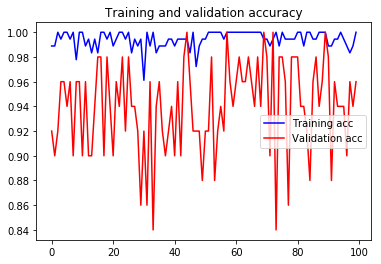

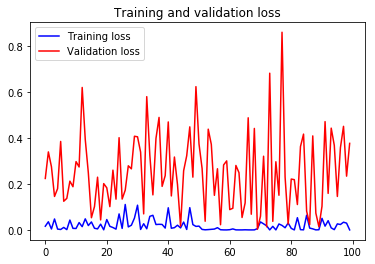

In [35]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
 
epochs = range(len(acc))
 
plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
 
plt.figure()
 
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
 
plt.show()

In [40]:
def plot_confusion_matrix(cm, classes, 
                            normalize=False,
                            title='Confusion matrix',
                            cmap=plt.cm.Blues):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    ticks_marks - np.arrange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1) [:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    
    print (cm)

    thresh= cm.max() /2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                horizontalalignment="center",
                color="white" if cm[i,j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')




In [5]:
test_batches.class_indices

{'Analyn': 0,
 'Franz Clint': 1,
 'Genie': 2,
 'Joevert': 3,
 'John Arjay': 4,
 'Jovit': 5,
 'Mardon': 6,
 'Nino Vincent': 7,
 'Ruel James': 8,
 'Sherwin': 9}

In [63]:
y_pred = np.argmax(predictions, axis=1)

In [6]:
test_labels= test_batches.classes